In [78]:
import pandas as pd
import seaborn as sns

In [79]:
data2=pd.read_csv("post-operative.dat",header=None,names=['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'Decision'], skiprows=13)

In [80]:
data2.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [81]:
for n, c in enumerate(data2.columns):
    print('Variable {}\n\tname: {}\n\ttype: {}'.format(n, c, type(data2.iloc[0, n])))
    print('\tUnique Values: {}'.format(data2[c].unique()))

Variable 0
	name: L-CORE
	type: <class 'str'>
	Unique Values: ['mid' 'high' 'low']
Variable 1
	name: L-SURF
	type: <class 'str'>
	Unique Values: ['low' 'high' 'mid']
Variable 2
	name: L-O2
	type: <class 'str'>
	Unique Values: ['excellent' 'good']
Variable 3
	name: L-BP
	type: <class 'str'>
	Unique Values: ['mid' 'high' 'low']
Variable 4
	name: SURF-STBL
	type: <class 'str'>
	Unique Values: ['stable' 'unstable']
Variable 5
	name: CORE-STBL
	type: <class 'str'>
	Unique Values: ['stable' 'unstable' 'mod-stable']
Variable 6
	name: BP-STBL
	type: <class 'str'>
	Unique Values: ['stable' 'mod-stable' 'unstable']
Variable 7
	name: COMFORT
	type: <class 'str'>
	Unique Values: ['15' '10' '05' '07' '?']
Variable 8
	name: Decision
	type: <class 'str'>
	Unique Values: ['A' 'S' 'I']


We have to remove ? with mode in comfort

In [82]:
data2["COMFORT"].value_counts()

10    65
15    19
?      3
05     2
07     1
Name: COMFORT, dtype: int64

In [83]:
data2["COMFORT"].value_counts()

10    65
15    19
?      3
05     2
07     1
Name: COMFORT, dtype: int64

In [84]:
data2.query("COMFORT=='?'")

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
46,low,mid,good,high,unstable,stable,stable,?,I
48,high,high,excellent,high,stable,stable,unstable,?,A
70,mid,low,excellent,mid,unstable,unstable,unstable,?,A


In [85]:
data2["COMFORT"].replace("?",data2["COMFORT"].mode()[0],inplace=True)

In [86]:
data2["COMFORT"].mode()

0    10
dtype: object

In [87]:
data3=data2.copy()

In [88]:
data4=data3.astype('category',inplace=True)

In [89]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
L-CORE       90 non-null category
L-SURF       90 non-null category
L-O2         90 non-null category
L-BP         90 non-null category
SURF-STBL    90 non-null category
CORE-STBL    90 non-null category
BP-STBL      90 non-null category
COMFORT      90 non-null category
Decision     90 non-null category
dtypes: category(9)
memory usage: 1.9 KB


In [90]:
data4['L-SURF'].cat.codes

0     1
1     0
2     1
3     1
4     2
5     1
6     1
7     2
8     0
9     1
10    2
11    1
12    0
13    0
14    1
15    0
16    0
17    1
18    0
19    2
20    0
21    2
22    2
23    2
24    0
25    2
26    2
27    2
28    2
29    2
     ..
60    0
61    1
62    2
63    1
64    2
65    2
66    1
67    2
68    2
69    2
70    1
71    1
72    2
73    2
74    1
75    2
76    2
77    2
78    2
79    2
80    2
81    2
82    1
83    2
84    2
85    2
86    2
87    2
88    2
89    2
Length: 90, dtype: int8

In [91]:
def get_cat_code(str_val):
    if str_val in ['low', 'good', 'unstable', '05', 'I']:
        return 0
    if str_val in ['high', 'excellent', 'mod-stable', '07', 'A']:
        return 1
    if str_val in ['mid', '10', 'stable', '10', 'S']:
        return 2
    if str_val in ['15']:
        return 3

In [92]:
for c in data4.columns:
    data4['x_' + c] = data4[c].apply(lambda x: get_cat_code(x))

In [93]:
data4.drop(data2.columns, axis=1, inplace=True)
data4.columns = data4.columns

In [94]:
data4.head()

,x_L-CORE,x_L-SURF,x_L-O2,x_L-BP,x_SURF-STBL,x_CORE-STBL,x_BP-STBL,x_COMFORT,x_Decision
0,2,0,1,2,2,2,2,3,1
1,2,1,1,1,2,2,2,2,2
2,1,0,1,1,2,2,1,2,1
3,2,0,0,1,2,0,1,3,1
4,2,2,1,1,2,2,2,2,1


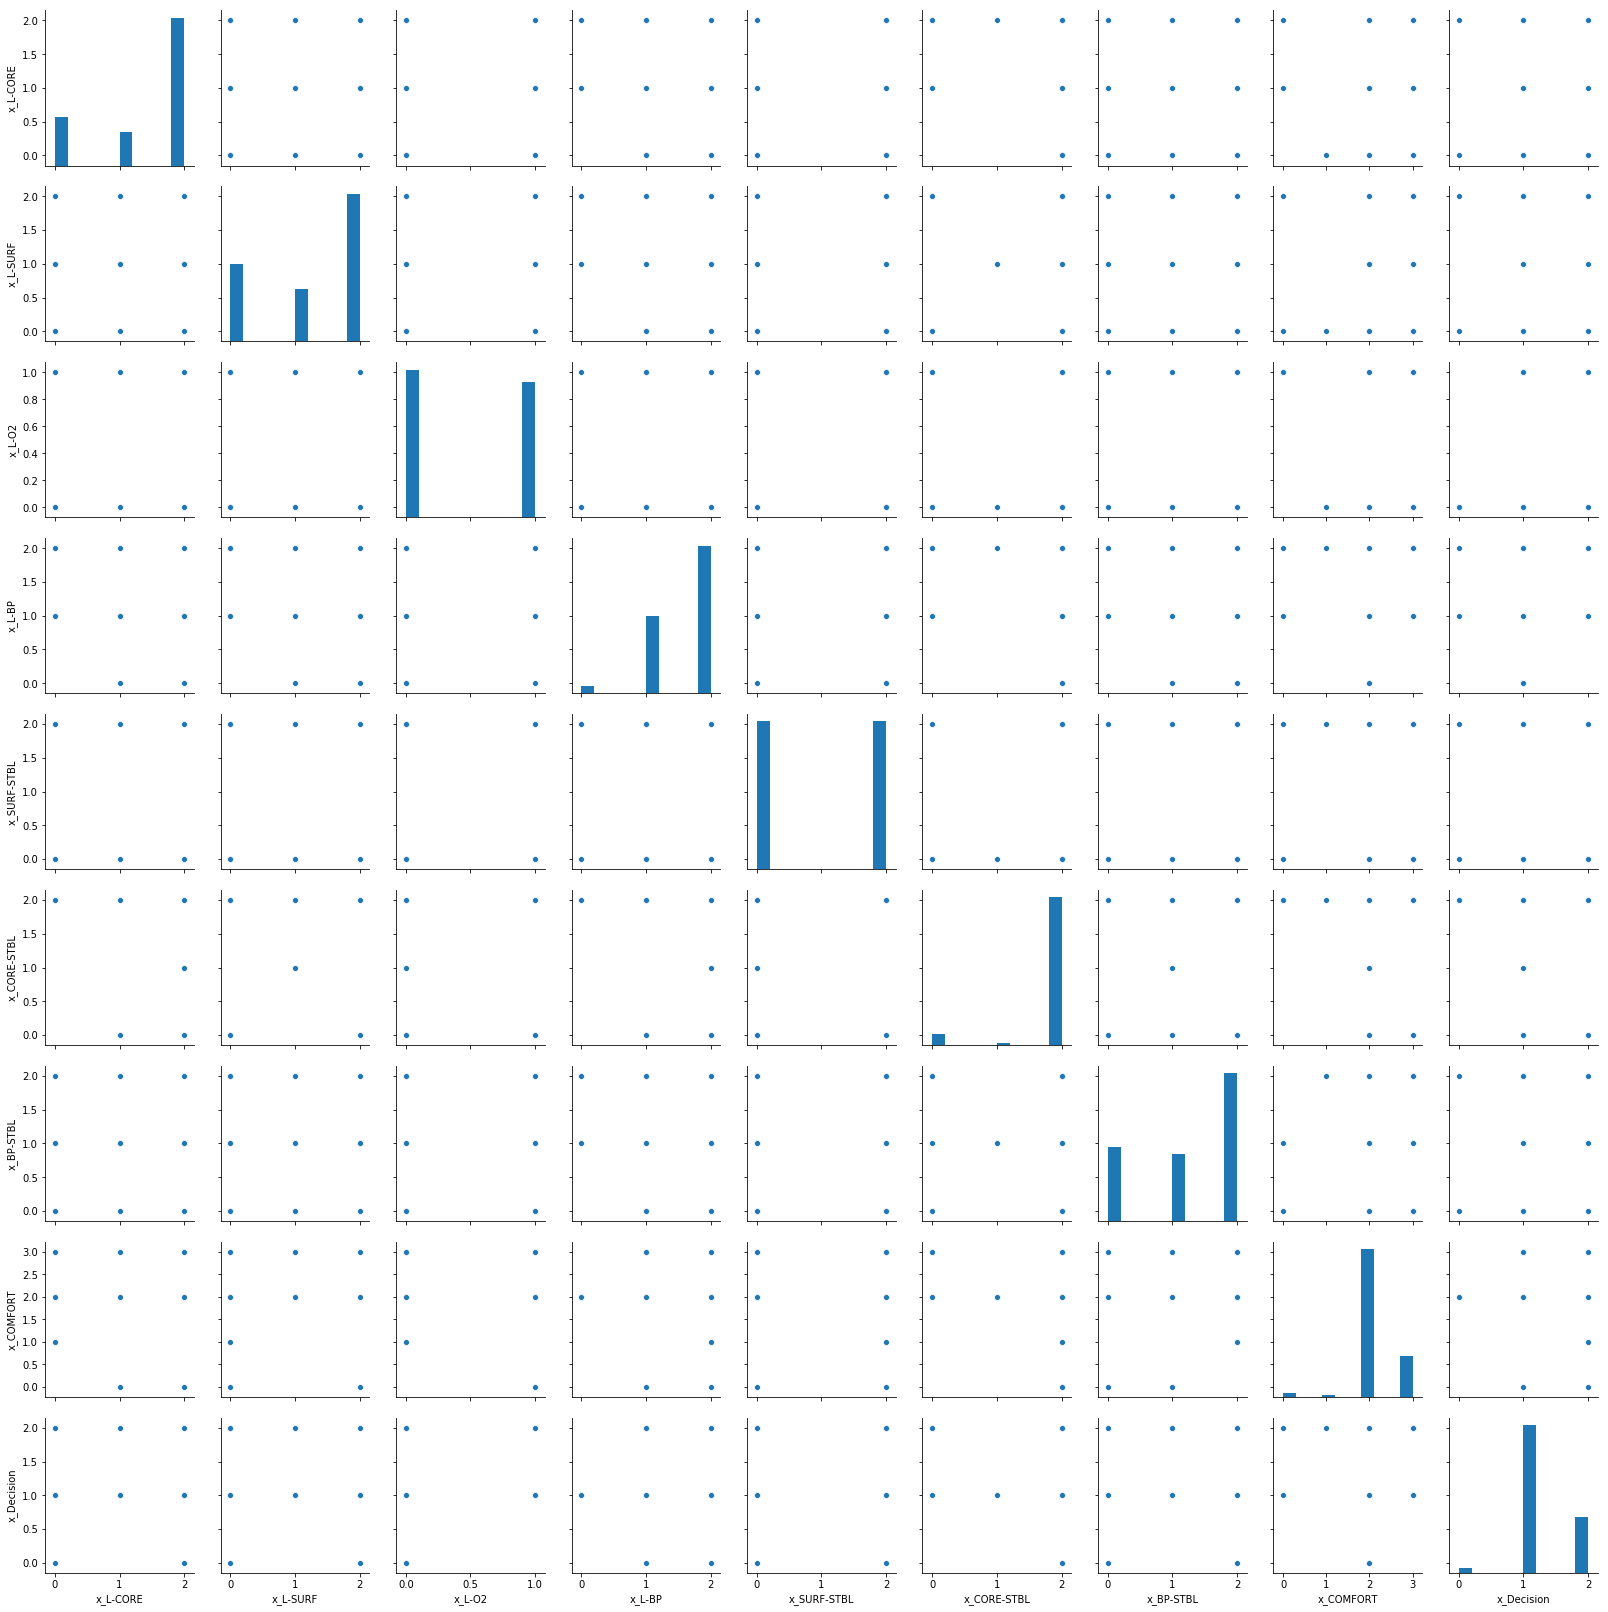

In [95]:
sns.pairplot(data4)

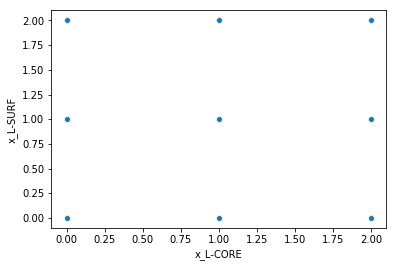

In [98]:
sns.scatterplot(x='x_L-CORE',y='x_L-SURF',data=data4)

In [96]:
data4.columns


Index(['x_L-CORE', 'x_L-SURF', 'x_L-O2', 'x_L-BP', 'x_SURF-STBL',
       'x_CORE-STBL', 'x_BP-STBL', 'x_COMFORT', 'x_Decision'],
      dtype='object')

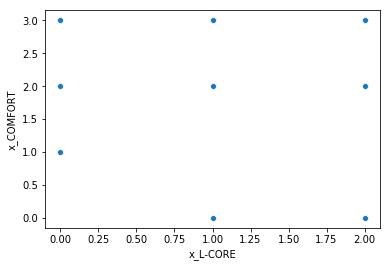

In [103]:
sns.scatterplot(x='x_L-CORE',y='x_COMFORT',data=data4)